In [10]:
import pickle

from pprint import pprint
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

import sys, os
sys.path.append(os.path.abspath("../../src"))
from visualisation import confusion

In [3]:
DATA_PATH = "../../datasets/bbc/tfidf/"
df = pd.read_csv('../../datasets/bbc/contents.csv', dtype={'label': 'category'})

with open(DATA_PATH+'features_train.pickle', 'rb') as data:
    features_train = pickle.load(data)

with open(DATA_PATH+'labels_train.pickle', 'rb') as data:
    labels_train = pickle.load(data)

with open(DATA_PATH+'features_test.pickle', 'rb') as data:
    features_test = pickle.load(data)

with open(DATA_PATH+'labels_test.pickle', 'rb') as data:
    labels_test = pickle.load(data)


# Fit

In [4]:
mnbc = MultinomialNB()
mnbc

MultinomialNB()

In [5]:
mnbc.fit(features_train, labels_train)
mnbc_pred = mnbc.predict(features_test)

# Performance analysis

In [7]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, mnbc.predict(features_train)))

The training accuracy is: 
0.9465891062929667


In [8]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, mnbc_pred))

The test accuracy is: 
0.9461077844311377


In [13]:
# Classification report
print("Classification report")
print(classification_report(labels_test,mnbc_pred))

Classification report
              precision    recall  f1-score   support

           0       0.91      0.96      0.94        76
           1       0.95      0.95      0.95        58
           2       0.95      0.90      0.93        63
           3       0.95      0.96      0.95        77
           4       0.98      0.95      0.97        60

    accuracy                           0.95       334
   macro avg       0.95      0.94      0.95       334
weighted avg       0.95      0.95      0.95       334



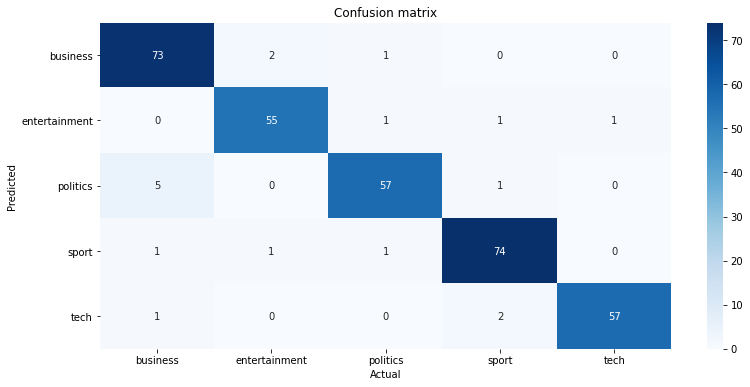

In [12]:
confusion(df, mnbc_pred, labels_test)

# Sauvegardes

In [17]:
with open('../../models/bbc/best_mnbc.pickle', 'wb') as output:
    pickle.dump(mnbc, output)

In [18]:
with open('../../models/bbc/best_mnbc.pickle', 'rb') as f:
    best_mnbc = pickle.load(f)

In [19]:
df_sc = pd.read_csv("../../models/bbc/models_score.csv")

In [20]:
row = [
    'MNBC',
    accuracy_score(labels_train, best_mnbc.predict(features_train)),
    accuracy_score(labels_test, best_mnbc.predict(features_test))
    ]

In [21]:
df_sc.loc[len(df_sc)] = row

In [23]:
df_sc.to_csv('../../models/bbc/models_score.csv', index=False)